File: jupyter/notebooks/tcdiags.be2002_pi.ipynb\
Author: Henry R. Winterbottom\
Date: 26 August 2023

Topic: This notebook computes and plots the tropical cyclone (TC) potential intensity (PI) metrics described by Bister and Emanuel [2002].

References: 
  
    Bister, M., and K. A. Emanuel. "Low frequency variability of tropical cyclone potential intensity, 1, Interannual to interdecadal variability". Journal of Geophysical Research 107 (2002): 4801.
  
    Gifford, D. M., "pyPI (v1.3): Tropical cyclone potential intensity calculations in Python". Geoscientific Model Development 14 (2020): 2351-2369.

In [1]:
import matplotlib.pyplot as plt
import numpy
import cmocean
from confs.yaml_interface import YAML
from plottools.build_basemap import build_basemap
from plottools.draw_basemap import draw_basemap
from tcdiags.tcdiags import TCDiags
from tools import parser_interface

### User Configuration

In [2]:
# YAML-formatted configuration files.
yaml = "/home/ufs_tcdiags/parm/tcdiags.demo.yaml"

# Plotting attributes.
mslp_cint = 25.0
mslp_cmax = 1025.0
mslp_cmin = 850.0
mslp_cmap = cmocean.cm.haline

vmax_cint = 20.0
vmax_cmax = 120.0
vmax_cmin = 0.0
vmax_cmap = "jet"

### Compute the tropical cyclone potential intensity metrics.

In [3]:
options_obj = parser_interface.object_define()
options_obj.yaml = yaml
options_obj.tcpi = True
tcdiag_obj = TCDiags(options_obj=options_obj)
tcpi = tcdiag_obj.run().tcpi

2023-09-05 19:23:17 :: WARNING :: utils.schema_interface: Schema optional value derived has not been defined; setting to default value False.
2023-09-05 19:23:17 :: WARNING :: utils.schema_interface: Schema optional value method has not been defined; setting to default value None.
2023-09-05 19:23:17 :: WARNING :: utils.schema_interface: Schema optional value module has not been defined; setting to default value None.
2023-09-05 19:23:17 :: WARNING :: utils.schema_interface: Schema optional value scale_mult has not been defined; setting to default value 1.0.
2023-09-05 19:23:17 :: WARNING :: utils.schema_interface: Schema optional value scale_add has not been defined; setting to default value 0.0.
2023-09-05 19:23:17 :: INFO :: utils.schema_interface: 

+--------------+--------+------------+-----------------+---------------------------------------------+
|   Variable   |  Type  |  Optional  | Default Value   | Assigned Value                              |
+==============+========+=====

### Plot the tropical cyclone potential intensity metrics.

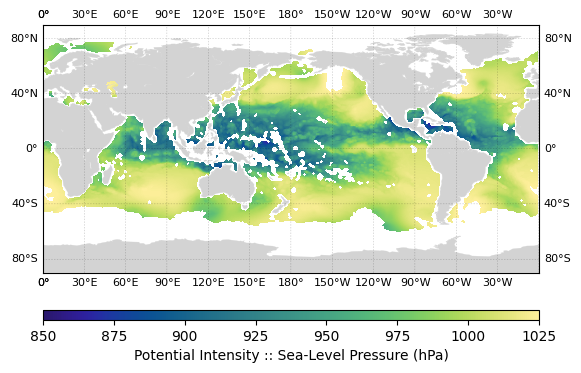

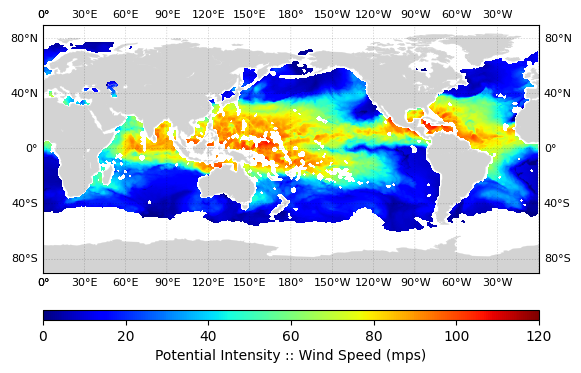

In [4]:
(basemap, x, y) = build_basemap(lat=tcpi.lats, lon=tcpi.lons)
draw_basemap(basemap=basemap)

levels = numpy.linspace(mslp_cmin, mslp_cmax, 255)
plt.contourf(x, y, tcpi.pmin.values, levels=levels, cmap=mslp_cmap)
ticks = numpy.arange(mslp_cmin, (mslp_cmax + 0.01), mslp_cint)
plt.colorbar(
    orientation="horizontal",
    ticks=ticks,
    pad=0.1,
    aspect=50,
    label="Potential Intensity :: Sea-Level Pressure (hPa)",
)
plt.savefig("tcpi.pmin.png", dpi=500, transparent=False, bbox_inches="tight")
plt.show()

levels = numpy.linspace(vmax_cmin, vmax_cmax, 255)
basemap.contourf(x, y, tcpi.vmax.values, levels=levels, cmap=vmax_cmap)
ticks = numpy.arange(vmax_cmin, (vmax_cmax + 0.01), vmax_cint)
plt.colorbar(
    orientation="horizontal",
    ticks=ticks,
    pad=0.1,
    aspect=50,
    label="Potential Intensity :: Wind Speed (mps)",
)
plt.savefig("tcpi.vmax.png", dpi=500, transparent=False, bbox_inches="tight")
plt.show()